# Logistics regression 

In [1]:
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
fish = pd.read_csv(dataset_url, error_bad_lines=False)
fish.head()

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# we can se Species has logistic , let us find unique of species

In [7]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# there are 7 different outputs so this is multiclass logistic regression problem

In [8]:
#will find null values

In [9]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [10]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [12]:
# divide data into dependent and independent
X = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']

In [15]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [16]:
#Scaling the input features using MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [18]:
X_scaled

array([[1.46666667e-01, 3.04854369e-01, 3.09090909e-01, 3.58108108e-01,
        5.68334049e-01, 4.18978349e-01],
       [1.75757576e-01, 3.20388350e-01, 3.25454545e-01, 3.78378378e-01,
        6.24055350e-01, 4.59235453e-01],
       [2.06060606e-01, 3.18446602e-01, 3.29090909e-01, 3.76689189e-01,
        6.18123353e-01, 5.14278868e-01],
       [2.20000000e-01, 3.65048544e-01, 3.74545455e-01, 4.17229730e-01,
        6.38566105e-01, 4.80364795e-01],
       [2.60606061e-01, 3.68932039e-01, 3.74545455e-01, 4.25675676e-01,
        6.21965801e-01, 5.76003608e-01],
       [2.72727273e-01, 3.74757282e-01, 3.87272727e-01, 4.37500000e-01,
        6.89202837e-01, 5.46882048e-01],
       [3.03030303e-01, 3.74757282e-01, 3.87272727e-01, 4.34121622e-01,
        7.22699465e-01, 5.96371786e-01],
       [2.36363636e-01, 3.90291262e-01, 3.92727273e-01, 4.42567568e-01,
        6.35083524e-01, 5.13419035e-01],
       [2.72727273e-01, 3.90291262e-01, 3.92727273e-01, 4.44256757e-01,
        7.12565153e-01, 

In [19]:
#Label Encoding the target(y) variable using LabelEncoder
#because we have x values are in numericals so we need toconvert op variavble 

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [24]:
#Splitting into train and test datasets using train_test_split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building and training

In [26]:
from sklearn.linear_model import LogisticRegression
clg = LogisticRegression()
# training the model
clg.fit(X_train, y_train)

LogisticRegression()

In [28]:
# if we define x and y thats enough for train and test data split since we apply import libbrary 
X_train

array([[0.03121212, 0.14563107, 0.14181818, 0.14189189, 0.16623521,
        0.2232747 ],
       [0.34363636, 0.69320388, 0.68363636, 0.67398649, 0.35194967,
        0.53879116],
       [0.20606061, 0.3184466 , 0.32909091, 0.37668919, 0.61812335,
        0.51427887],
       [0.07272727, 0.24271845, 0.24727273, 0.24831081, 0.2543213 ,
        0.33264265],
       [0.0969697 , 0.25242718, 0.25636364, 0.27871622, 0.30791823,
        0.39082939],
       [0.07272727, 0.23106796, 0.22909091, 0.25168919, 0.2545883 ,
        0.3166864 ],
       [0.08787879, 0.23883495, 0.23818182, 0.25844595, 0.46480852,
        0.2973472 ],
       [0.4969697 , 0.56504854, 0.55636364, 0.54898649, 0.62122865,
        0.88855999],
       [0.43636364, 0.47572816, 0.48363636, 0.53716216, 0.84936675,
        0.71075778],
       [0.3030303 , 0.66990291, 0.66545455, 0.66216216, 0.30365787,
        0.54245602],
       [0.00454545, 0.04854369, 0.03818182, 0.0472973 , 0.01413928,
        0.01584348],
       [0.06666667, 0

In [29]:
#Predicting the output

In [31]:
y_pred = clg.predict(X_test)

In [36]:
#Computing the accuracy

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [40]:
accuracy

0.8125

In [45]:
import seaborn as sns

Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

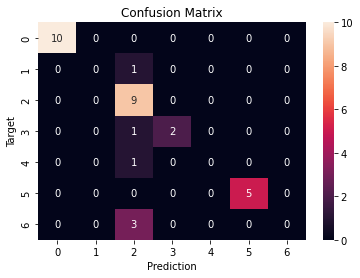

In [46]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')